In [1]:
import pandas as pd 
import numpy as np
import tools 

In [2]:
# read the data
# df = pd.read_pickle('data/selected_data.pkl')
df = pd.read_pickle('data/selected_data.pkl')

# print the shape of the data 
print(f'Data contains {df.shape[0]} rows and {df.shape[1]} columns')

Data contains 83 rows and 62 columns


In [3]:
y_labels = ['gdp_growth']
X_labels = [col for col in df.columns if col not in y_labels+['constant']]

# define the data
X = df[X_labels].values
y = df[y_labels].values

# standardize the data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
# y = (y - np.mean(y, axis=0)) / np.std(y, axis=0)

# Define the number of samples and features
n = X.shape[0] # number of samples
p = df.shape[1] # number of features

In [4]:
x_chosen = X[:,:]
y_chosen = y[:]

lasso_ = tools.MyLasso_123(X=x_chosen, y=y_chosen)

print('BCCH \n','---'*10,)
print('Baby step')
penalty_term_obj = tools.penalty_term(X=x_chosen, y=y_chosen, alpha=0.05, c=1.1, n=n, p=p)
p_lambda = penalty_term_obj.bcch_pilot_rule()
beta_pilot = lasso_.lasso(p_lambda).coef_
print(f'We get a lambda={p_lambda:.4f}\n',beta_pilot,'\n', '---'*2)

# d
print('Grown up step')
residuals = y_chosen - x_chosen @ beta_pilot
bcch_lambda = penalty_term_obj.bcch_rule(residuals=residuals)


beta_bcch = lasso_.lasso(bcch_lambda).coef_
print(f'We get a lambda={bcch_lambda:.4f}\n',beta_bcch)
# print(f'lambda: {bcch_lambda:.6f} \n bcch betas\n', beta_bcch)
print('---'*10,'\n'*2)
# try with BRT 

print('BRT \n','---'*10,)
brt_lambda = penalty_term_obj.brt_rule(sigma=0.1)
beta_brt = lasso_.lasso(brt_lambda).coef_
print(f'We get a lambda={brt_lambda:.4f}\n',np.around(beta_brt,2))
print('---'*10,)



BCCH 
 ------------------------------
Baby step
We get a lambda=0.0116
 [-0. -0. -0.  0. -0.  0.  0. -0.  0.  0. -0. -0. -0. -0. -0.  0.  0.  0.
 -0.  0.  0.  0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.
  0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0.
 -0.  0.  0.  0.  0. -0.] 
 ------
Grown up step
We get a lambda=0.0116
 [-0. -0. -0.  0. -0.  0.  0. -0.  0.  0. -0. -0. -0. -0. -0.  0.  0.  0.
 -0.  0.  0.  0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.
  0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0.
 -0.  0.  0.  0.  0. -0.]
------------------------------ 


BRT 
 ------------------------------
We get a lambda=0.0809
 [-0. -0. -0.  0. -0.  0.  0. -0.  0.  0. -0. -0. -0. -0. -0.  0.  0.  0.
 -0.  0.  0.  0. -0.  0. -0.  0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0.
  0.  0.  0. -0. -0.  0. -0.  0.  0. -0. -0.  0. -0.  0. -0. -0. -0. -0.
 -0.  0.  0.  0.  0. -0.]
------------------------------


In [7]:
# Create a grid using numpy.geomspace
penalty_grid = np.geomspace(0.00001,0.5,100)

coefs=[]
non_zeros = {}
lss = tools.MyLasso_123(X=x_chosen, y=y_chosen, max_iter=100_000, fit_intercept=False)

for lamb in penalty_grid:
    fit = lss.lasso(lamb)
    non_zeros[lamb] = len([i for i in range(len(fit.coef_)) if fit.coef_[i] != 0])
    coefs.append({name: coef for name, coef in zip(X_labels, fit.coef_)}) # Note how we extract the coefficients from fit and append them to coefs

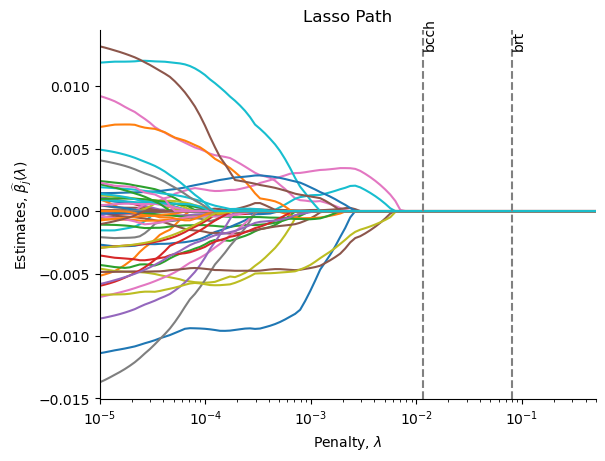

In [8]:
# Plot lasso path
tools.plot_lasso_path(penalty_grid, [list(val.values()) for val in coefs],legends=X_labels, vlines={'brt':brt_lambda,'bcch':bcch_lambda},)